In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


* 정확도

In [3]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y,y_pred)
print(f'정확도 : {round(accuracy,3)}')

정확도 : 0.912


* 정밀도

In [4]:
from sklearn.metrics import precision_score

precision=precision_score(y,y_pred)
print(f'정밀도: {round(precision,3)}')

정밀도: 0.901


* 재현율

In [5]:
from sklearn.metrics import recall_score

recall=recall_score(y,y_pred)
print(f'재현율: {round(recall,3)}')

재현율: 0.858


* F1 score

In [6]:
from sklearn.metrics import f1_score

f1=f1_score(y,y_pred)
print(f'f1 score: {round(f1,3)}')

f1 score: 0.879


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [16]:
from sklearn.preprocessing import Binarizer
pred_proba=model_lor.predict_proba(X)
pred_proba0= pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=0.1)
y_pred2=binarizer.transform(pred_proba0)

In [17]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred2)
print(f'혼동행렬:\n {cm}')

accuracy=accuracy_score(y,y_pred2)
print(f'정확도 : {round(accuracy,3)}')

precision=precision_score(y,y_pred2)
print(f'정밀도: {round(precision,3)}')

recall=recall_score(y,y_pred2)
print(f'재현율: {round(recall,3)}')
f1=f1_score(y,y_pred2)
print(f'f1 score: {round(f1,3)}')

혼동행렬:
 [[267  90]
 [  6 206]]
정확도 : 0.831
정밀도: 0.696
재현율: 0.972
f1 score: 0.811


* ROC 곡선 시각화

In [18]:
from sklearn.metrics import roc_curve

#임곗값에 따른 FPR, TPR 값을 반환받음
fprs, tprs, thresholds= roc_curve(y, pred_proba[:,1])

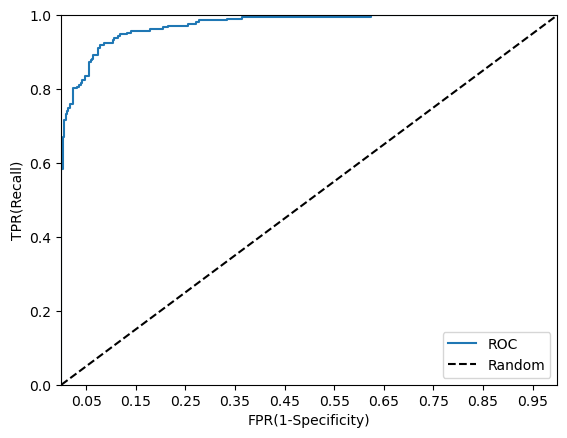

In [19]:
import matplotlib.pyplot as plt
#ROC 곡선을 그래프 곡선으로 그림
plt.plot(fprs, tprs, label='ROC')
#가운데 대각선 직선을 그림
plt.plot([0,1],[0,1],'k--', label='Random')

#FPR x축의 scale을 0.1로 변경, X축,Y축명 설정 등
start,end=plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR(1-Specificity)')
plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()

* ROC AUC 값

In [20]:
from sklearn.metrics import roc_auc_score

pred_proba=model_lor.predict_proba(X)[:,1]
roc_score=roc_auc_score(y, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9742
